In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

Tento sešit ilustruje jednoduché numerické metody počítání integrálu
$$I=\int_a^bf$$

V následující buňce funkci $f$ а meze intervalu $(a,b)$, přes který integrujeme. Dále nastavíme počet $n$ dílů, na který se interval rozdělí, čímž dostaneme krok $h=(b-a)/n$.

Nakonec proměnná `xint` bude obsahovat pole, ve kterém bude schovaná posloupnost $(x_i)_{i=0}^{n}$, $x_i=a+ih$ (jinými slovy „navzorkujeme“ interval $(a,b)$ pomocí $n+1$ hodnot $x_0,\dots,x_n$ včetně těch krajních). V proměnné `yint` budou pak obrazy těchto bodů $y_i=f(x_i)$.

In [70]:
def f(x):
    return np.exp(x)

a,b=1,7
n=4
h=(b-a)/n
xint=np.linspace(a,b,n+1)
yint=f(xint)

Pro každou metodu vypočítáme danou aproximaci a její funkci ilustrujeme grafem.

Začneme metodou levých obdélníků, kde aproximujeme $I\thickapprox \sum_{i=0}^{n-1}f(x_i)h$

471.2862871297907

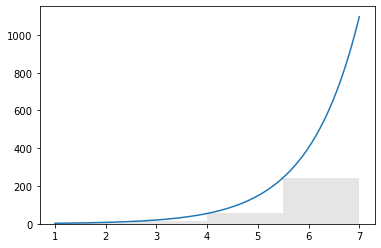

In [71]:
x=np.linspace(a,b,200)
plt.plot(x,f(x))
plt.bar(xint[:-1],yint[:-1],width=h,alpha=0.2,align='edge',facecolor='gray')

sum(yint[:-1])*h

Pokračujeme metodou pravých obdélníků s $I\thickapprox \sum_{i=1}^nf(x_i)h$

2112.15860202979

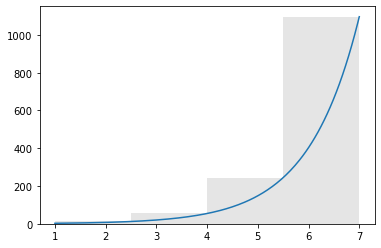

In [72]:
x=np.linspace(a,b,200)
plt.plot(x,f(x))
plt.bar(xint[:-1],yint[1:],width=h,alpha=0.2,align='edge',facecolor='gray')

sum(yint[1:])*h

Skončíme metodou lichoběžníků, která je vlastně průměrem dvou předchozích. Výpočet lze zapsat jako $I\thickapprox \sum_{i=0}^{n-1}{f(x_i)+f(x_{i+1})\over 2}h$

1291.7224445797904

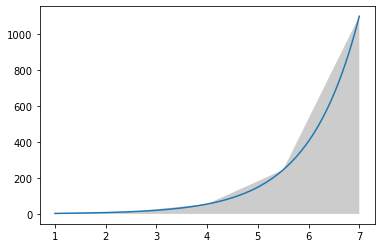

In [73]:
x=np.linspace(a,b,200)
plt.plot(x,f(x))
plt.fill_between(xint, 0, yint, facecolor='gray', alpha=0.4)

sum(yint[1:] + yint[:-1])*h/2

Naše odhady můžeme porovnat s hodnotou spočítanou pomocí jakési vestavěné knihovny v Pythonu. (První číslo je hodnota integrálu, druhé je chyba.)

In [74]:
integrate.trapezoid(yint,xint)

1291.7224445797904

In [75]:
integrate.simpson(yint,xint)

1118.0227226114507

In [76]:
quad(f,a,b)

(1093.9148765999996, 1.2144894829813064e-11)